In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

np.set_printoptions(precision=6)

In [2]:
# --- CONSTANTS ---
f = 100e6  # Frequency of modulation is 100 MHz (from lab manual)
c_accepted = 2.99792e8 # Accepted speed of light in air (m/s)

# --- DATA INPUT ---
# Laser light travel distance (in meters)
distance2 = np.array([3.000, 4.580, 6.169, 7.762])
# Phase shift (in radians)
phase_shift2 = np.array([8.2803, 11.582, 14.881, 18.244])
# Phase shift uncertainty (in radians)
phase_shift_err2 = np.array([0.0010, 0.0012, 0.0011, 0.0014])

In [3]:
# --- METHOD 1: CURVE_FIT (Weighted by uncertainties) ---

def StraightLine(x, m, c):
    return m * x + c

# Perform weighted fit
line, cov = curve_fit(StraightLine, distance2, phase_shift2, sigma=phase_shift_err2, absolute_sigma=True)

# Extract parameters
m_cf = line[0]
c_cf = line[1]
err_m_cf = np.sqrt(cov[0, 0])
err_c_cf = np.sqrt(cov[1, 1])

# Calculate Speed of Light (v) from Slope
# Slope m = 2*pi*f / v  --->  v = 2*pi*f / m
v_cf = (2 * np.pi * f) / m_cf
# Uncertainty propagation: sigma_v = v * (sigma_m / m)
err_v_cf = v_cf * (err_m_cf / m_cf)

# Compute chi-squared
phase_shift_fit_cf = StraightLine(distance2, *line)
residuals_cf = phase_shift2 - phase_shift_fit_cf
chisq = ((residuals_cf) / phase_shift_err2)**2
chisq_sum = chisq.sum()
dof = len(phase_shift2) - 2
red_chisq = chisq_sum / dof

In [4]:
# --- METHOD 2: POLYFIT (Unweighted / Central values only) ---

# Perform unweighted fit (degree 1 = linear)
# cov=True returns the covariance matrix based on the residuals (scatter)
poly_params, poly_cov = np.polyfit(distance2, phase_shift2, 1, cov=True)

m_pf = poly_params[0]
c_pf = poly_params[1]
err_m_pf = np.sqrt(poly_cov[0, 0])
err_c_pf = np.sqrt(poly_cov[1, 1])

# Calculate Speed of Light (v) for Polyfit
v_pf = (2 * np.pi * f) / m_pf
err_v_pf = v_pf * (err_m_pf / m_pf)

In [5]:
# --- OUTPUTS AND PLOTS ---

print("="*40)
print("ANALYSIS RESULTS")
print("="*40)

print("\n--- 1. CURVE_FIT RESULTS (Weighted) ---")
print(f"Slope (m):        {m_cf:.5f} +/- {err_m_cf:.5f} rad/m")
print(f"Intercept (c):    {c_cf:.4f} +/- {err_c_cf:.4f} rad")
print(f"Chi-squared:      {chisq_sum:.2f}")
print(f"Reduced Chi-sq:   {red_chisq:.3f}")
print(f"Calculated v:     {v_cf:.5e} +/- {err_v_cf:.3e} m/s")

print("\n--- 2. POLYFIT RESULTS (Unweighted) ---")
print(f"Slope (m):        {m_pf:.5f} +/- {err_m_pf:.5f} rad/m")
print(f"Intercept (c):    {c_pf:.4f} +/- {err_c_pf:.4f} rad")
print(f"Calculated v:     {v_pf:.5e} +/- {err_v_pf:.3e} m/s")

print("\n--- 3. COMPARISON & AGREEMENT ---")
# Percent Error relative to accepted value
diff_cf = abs(v_cf - c_accepted)
sigma_diff_cf = err_v_cf # Approximation assuming accepted value has 0 error
agreement_cf = diff_cf / sigma_diff_cf

print(f"Accepted c:   {c_accepted:.3e} m/s")
print(f"Curve_fit Discrepancy: {agreement_cf:.2f} sigma")
if agreement_cf < 2:
    print(" -> curve_fit result AGREES with accepted value (< 2 sigma).")
else:
    print(" -> curve_fit result DISAGREES with accepted value (> 2 sigma).")

ANALYSIS RESULTS

--- 1. CURVE_FIT RESULTS (Weighted) ---
Slope (m):        2.08939 +/- 0.00033 rad/m
Intercept (c):    2.0090 +/- 0.0018 rad
Chi-squared:      420.48
Reduced Chi-sq:   210.239
Calculated v:     3.00718e+08 +/- 4.760e+04 m/s

--- 2. POLYFIT RESULTS (Unweighted) ---
Slope (m):        2.09072 +/- 0.00483 rad/m
Intercept (c):    2.0034 +/- 0.0274 rad
Calculated v:     3.00527e+08 +/- 6.947e+05 m/s

--- 3. COMPARISON & AGREEMENT ---
Accepted c:   2.998e+08 m/s
Curve_fit Discrepancy: 19.46 sigma
 -> curve_fit result DISAGREES with accepted value (> 2 sigma).


<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
C:\Users\arnav\AppData\Local\Temp\ipykernel_31380\3486482855.py:13: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f'Phase Shift vs Distance (Curve Fit)\nv = ({v_cf/1e8:.3f} $\pm$ {err_v_cf/1e8:.3f}) x $10^8$ m/s')


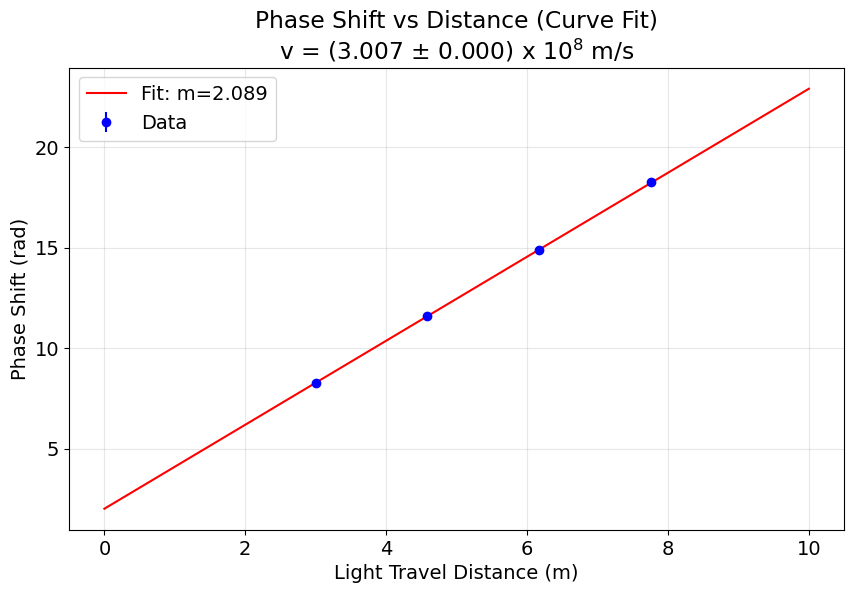

In [6]:
# --- PLOT 1: Phase vs Distance (Curve Fit) ---
plt.figure(figsize=(10, 6))
plt.rc('font', size=14)

# Data points with error bars
plt.errorbar(distance2, phase_shift2, yerr=phase_shift_err2, fmt='bo', label='Data')

# Fit line
xvalues = np.linspace(0, 10, 100)
yvalues_fit = StraightLine(xvalues, *line)
plt.plot(xvalues, yvalues_fit, 'r-', label=f'Fit: m={m_cf:.3f}')

plt.title(f'Phase Shift vs Distance (Curve Fit)\nv = ({v_cf/1e8:.3f} $\pm$ {err_v_cf/1e8:.3f}) x $10^8$ m/s')
plt.xlabel('Light Travel Distance (m)')
plt.ylabel('Phase Shift (rad)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\arnav\AppData\Local\Temp\ipykernel_31380\4037348974.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.title(f'Residuals of Curve Fit ($\chi^2_{{red}}$ = {red_chisq:.2f})')


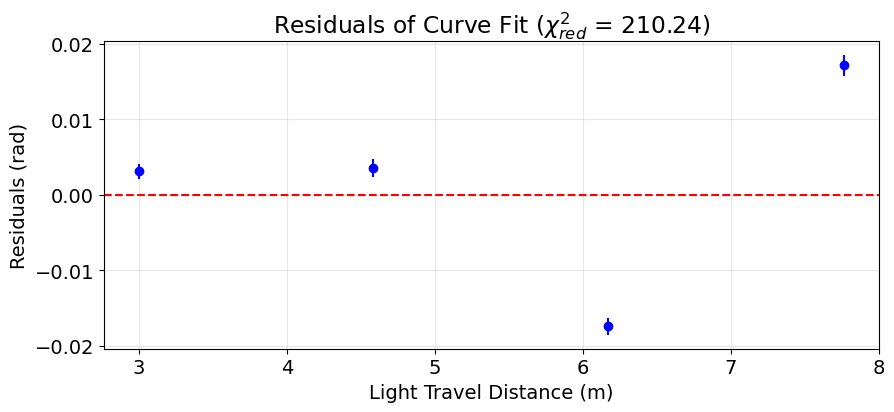

In [7]:
# --- PLOT 2: Residuals ---
plt.figure(figsize=(10, 4))
plt.errorbar(distance2, residuals_cf, yerr=phase_shift_err2, fmt='bo')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.title(f'Residuals of Curve Fit ($\chi^2_{{red}}$ = {red_chisq:.2f})')
plt.xlabel('Light Travel Distance (m)')
plt.ylabel('Residuals (rad)')
plt.grid(True, alpha=0.3)
plt.show()